# Spin Physics

Before opening up the MRI scanner, we must first understand what is fundamentally being measured by MRI, which are nuclear "spins", and how they behave in a magnetic field which includes the resonance phenomenom that forms the basis of MRI.  

## Learning Goals

1. Understand what MRI is measuring
1. Describe the concepts of polarization, resonance, and relaxation

## Nuclear Spin

A nuclear spin is defined as a nucleus with a non-zero net angular momentum.  This means that the nucleus has a net magnetic moment, $\mu$, meaning it can act as a small magnet.  It also experiences magnetic resonance, which means it will respond to a specific frequency of electromagnetic fields.  This resonance is the basis for the MRI signal.

In MRI, we are tyipcally imaging hydrogen nuclei ($^1 H$) which are about 80% of the atoms in our bodies.  The primary source of $^1 H$, also referred to as protons, is water, although protons in lipids are also imaged. 

Other nuclei also have spin, including $^{13}C, ^{19}F, ^{23}Na, ^{31}P$, but these are much less abundant and thus have less available signal compared to protons.

## Polarization

In the absence of a magnetic field, nuclear spins will be randomly aligned.  However when spins experience a magnetic field, they will preferentially align with that magnetic field.  In MRI, we cannot measure individual spins, but we observe the ensemble of spins,  which is is known as the Net Magnetization, $\vec{M}(\vec{r},t)$.  

FIGURES

Equilibrium magnetization before and after application of a strong magnetic field that polarizes the spins as reflected in increased density of arrows in the direction of the field (here vertical).  The large arrow pointing up represents the sum of all these spins, or the Net Magnetization. Source https://www.drcmr.dk/mr

### Equilibrium Magnetization

In MRI, we define the main magnetic field, $B_0$, to be oriented along the z-axis.  When a subject is placed in a MRI scanner, the equilibrium magnetic field is

$$\vec{B}(\vec{r},0) = 
\begin{bmatrix}
0 \\
0 \\
B_0 
\end{bmatrix}$$

Under this condition of equilibrium, the net magnetization is oriented in the direction of the main magnetic field

$$\vec{M}(\vec{r},0) = 
\begin{bmatrix}
0 \\
0 \\
M_0(\vec{r})
\end{bmatrix}$$

And has an amplitude of that is defined as the Equilibrium Magnetization:

$$M_0(\vec{r}) = \frac{N(\vec{r}) \bar{\gamma}^2 h^2 I_Z (I_Z +1) B_0}{3 k T}$$

that depends on
* $N(\vec{r})$ is the spin density
* $h$ is the Planck constant ($6.63 \times 10^{-34}$ J/Hz)
* $\bar{\gamma}$ is the gyromagnetic ratio ($42.58 \times 10^6$ Hz/T for hydrogen)
* $B_0$ is the magnetic field (e.g. 3 T)
* $I_Z$ is the spin number (1/2 for hydrogen)
* $k$ is Boltzmann’s constant ($1.38 \times 10^{-23}$ J/K) 
* $T$ is temperature (human body temperature = 310 K)


### Fractional Polarization

Another helpful formulation to describe the preference of spins to align with the magnetic field is to look at the fraction of spins that, if observed, would be aligned with the magnetic field.  This can be done using the Boltzman distribution that describes the ratio of spins in the spin-up, $N_\uparrow$, to the spin-down, $N_-$, states.  

$$ \frac{N_\uparrow}{N_\downarrow} = e^{h \bar{\gamma} B_0 / kT}$$ 

(This can also be used to derive the equilibrium magnetization above.)

From this distribution, a fractional polarization can be defined as the difference between spin up and spin down states, divided by the total number of spins, which describes the fraction of spins that contribute to the MR signal:

$$P = \frac{N_\uparrow - N_\downarrow}{N_\uparrow + N_\downarrow} = \frac{ 1 - e^{-h \bar{\gamma} B_0 / kT} }{ 1 + e^{-h \bar{\gamma} B_0 / kT} }$$ 

If the exponent is small (or, when the polarization is low), this simplifies to

$$ P = \frac{N_\uparrow - N_\downarrow}{N_\uparrow + N_\downarrow} \approx \frac{h \bar{\gamma} B_0}{2 kT}$$ 

Suppose we are studying protons in a "high" 3 T magnetic field in the human body (temperature is 310 K), how many spins are mismatched and contribute to detectable signal?

The answer is $P \approx 0.0000099$, around 10 ppm, which means out of every million spins in the sample only about 10 are unmatched don't have a partner in the high energy state and are giving NMR signal. For this reason we say NMR is actually a pretty **insensitive**!


In [6]:
B0 = 3; % T
h = 6.63e-34; % J/Hz
gammabar = 42.58e6; % Hz/T
k = 1.38e-23; % J/K
T = 310; % K

P = h * gammabar * B0 / (2*k*T)

P =  0.0000098985


## Resonance

When in a mangetic field, spins and therefore the net magnetization experience magnetic resonance, which means they will respond strongly to a specific frequency of electromagnetic fields.

An analogy for resonance is to consider a swing: In order to swing higher and higher, you must move your legs back and forth at the right rate.  If you move your legs at the wrong rate, you will simply not move much higher.

In MRI, we can perturb the net magnetization from equilibrium by applying a time-varying magnetic field ($B_1$) at the "resonance frequency".  This will perturb or "tip" the net magnetization away its equilibrium where it is in alignment with the magnetic field.

### Resonance Frequency

The magnetic resonance frequency is proportional to the magnetic field amplitude

$$f = \bar{\gamma} \|\vec{B}\|$$

When the magnetic field is simply our main field, $B_0$, then we get the so-called Larmor frequency

$$f_0 = \bar{\gamma} B_0$$

### Simulation of Resonance

For this simulation use the [CompassMR](https://www.drcmr.dk/CompassMR/) simulator for visualizing resonance.  To simulate

1. Start in the default compass mode, with an applied $B_0$ field(default)
1. Move the $B_1$ magnetic field slider - this should change the angle of the compass slightly
1. Now adjust the $B_1$ freq(uency) slider - if you choose the correct frequency, then you should be able to create large oscillations in the compass
1. Change the main field, $B_0$, and see that now you need a new $B_1$ freq(uency) to achieve resonance
1. Switch to using the Coil for $B_1$ in the top right checkbox and repeat.  This is one step closer to a real experiment.

## Precession

Precession refers to the rotation of the spins and therefore the net magnetization around the magnetic field.  This precession is part of the magnetic resonance phenomenom and is what creates signal in MRI.  The spins and net magnetization will rotate around the magnetic field, with the resonance frequency.

### Excitation

In order for precession to occur, the spins or net magnetization must not be aligned with the magnetic field.  As the nuclear spins are only preferentially aligned with the magnetic field, many of them will experience precession at any given time.  However, the net magnetization will be aligned with the magnetic field at equilibrium, and therefore will not precess.

To cause the net magnetization to precess, an time-varying magnetic field ($B_1$) is applied at the resonance frequency.  This perturbs the net magnetization away from alignment with the magnetic field, and it will continue to precess after the $B_1$ field is turned off.

Once we have precession of the net magnetization, it creates a time-varying magnetic field that can then be detected as MRI signal.

### Simulation of Precession

Again, use the [CompassMR](https://www.drcmr.dk/CompassMR/) simulator for visualizing resonance and precession.

1. Start in the default compass mode again
1. Hit the Push button in the top right.  Notice how the needle now precesses at a specific frequency
1. Switch on using the Coil for $B_1$ in the top right checkbox, and hit Push again.  Now the blue trace highlights the signal created in this coil by the precessing needle.  This is because the needle will also create a time-varying magnetic field that can be detected
1. Now switch to the Spin mode in the top right checkbox, and Push the spin.  It will now precess in 3D around the up-down direction of $B_0$

## Relaxation

Relaxation refers to the process by which the net magnetization, our ensemble of individual spins, returns to thermal equilibrium.  This is governed by 2 time constants, $T_1(\vec{r})$ - the longitudinal ($M_Z$) or spin-lattice relaxation time constant, and $T_2(\vec{r})$ - the transverse ($M_{XY}$) or spin-spin relaxation time constant.  These time constants differ depending on tissue composition and structure, and both of these relaxation time constants are valuable sources of MRI contrast.

### Simulation of Relaxation

One last time in this chapter, use the [CompassMR](https://www.drcmr.dk/CompassMR/) simulator.

1. Start in the default compass mode
1. Hit the Push button in the top right.  The needle will begin to precesses but then returns to alignment with the $B_0$ magnetic field (in the vertical direction).  This return to equilibrium is relaxation

### Relaxation Equations

How the net magnetization, $\vec{M}(\vec{r},t)$, behaves in returning to equilibrium is governed by the Bloch equation.  The full Bloch equation is covered in a later chapter, but we will begin here introducing the result for relaxation:

$$
\vec{M}(\vec{r},t) =
\begin{bmatrix}
e^{-t/T_2(\vec{r})} & 0 & 0 \\
0 & e^{-t/T_2(\vec{r})} & 0 \\
0 & 0 & 1
\end{bmatrix}
\vec{M}(\vec{r},0)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(\vec{r})(1-e^{-t/T_1(\vec{r})})
\end{bmatrix}
$$

It is extremely convenient to divide up the net magnetization vector into the separate transverse (XY) and longitudinal (Z) components.  The longitudinal component, $M_Z$, by convention is always aligned with $B_0$, the main magnetic field, whereas the transverse components, $M_X$ and $M_Y$ are both perpendicular to the direction of $B_0$.

For the transverse magnetization:

$$M_{XY}(\vec{r},t) = M_{XY}(\vec{r},0) e^{-t/T_2(\vec{r})}$$

This equation means that the transverse magnetization decays from its original value (when $t=0$) down to 0, with an exponential time constant $T_2(\vec{r})$.

For the longitudinal magnetization:

$$M_Z(\vec{r},t) = M_Z(\vec{r},0)e^{-t/T_1} + M_0(\vec{r},)(1- e^{-t/T_1(\vec{r})})$$

This equation means that the longitudinal magnetization returns or recovers to its equilibrium value, $M_0(\vec{r})$, with an exponential time constant $T_1(\vec{r})$.

Both are illustrated below.

In [4]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


In [7]:
t = linspace(0,1); % s

T1 = .8;  T2 = .1; % s
M0 = 1;

M_start = [M0, 0, 0].'; % start along MX

Mall = zeros(3,length(t));

for It = 1:length(t)
    Mall(:,It) = bloch_relax(M_start,t(It),M0,T1, T2);
end

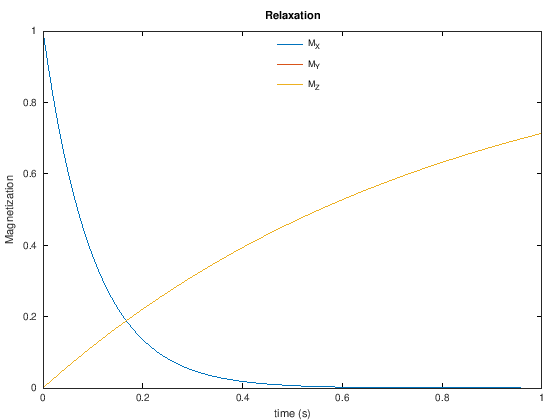

In [8]:
plot(t,Mall)
xlabel('time (s)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Relaxation'])